In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('customers.csv')

In [4]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [5]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [6]:
df.shape

(10695, 11)

In [7]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [8]:
df_cleaned = df.dropna(axis=0)

In [9]:
df_cleaned.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [10]:
df_cleaned.shape

(8819, 11)

In [11]:
df_cleaned.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [12]:
df_cleaned['Gender'].unique()


array(['Male', 'Female'], dtype=object)

In [13]:
df_cleaned['Ever_Married'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
df_cleaned['Graduated'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df_cleaned['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [16]:
df_cleaned['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [17]:
df_cleaned['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [18]:
df_cleaned['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [19]:
from sklearn.preprocessing import OrdinalEncoder

In [20]:
categories_list=[['Male', 'Female'],
           ['No', 'Yes'],
           ['No', 'Yes'],
           ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
            'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
           ['Low', 'Average', 'High']
           ]
enc = OrdinalEncoder(categories=categories_list)

In [21]:
cust_1 = df_cleaned.copy()

In [22]:
cust_1[['Gender',
             'Ever_Married',
              'Graduated','Profession',
              'Spending_Score']] = enc.fit_transform(cust_1[['Gender',
                                                                 'Ever_Married',
                                                                 'Graduated','Profession',
                                                                 'Spending_Score']])

In [23]:
cust_1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
cust_1['Segmentation'] = le.fit_transform(cust_1['Segmentation'])

In [26]:
cust_1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation         int32
dtype: object

In [27]:
cust_1 = cust_1.drop('ID',axis=1)
cust_1 = cust_1.drop('Var_1',axis=1)

In [28]:
cust_1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int32
dtype: object

In [29]:
cust_1.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
count,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000
mean,0.448804,0.591450,43.517859,0.634312,3.287561,2.610160,0.544846,2.840118,1.518086
std,0.497400,0.491594,16.581537,0.481650,2.346652,3.390676,0.738487,1.535051,1.146645
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,31.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.000000,41.000000,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,1.000000,4.000000,3.000000
max,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,3.000000


In [30]:
cust_1['Segmentation'].unique()

array([3, 1, 2, 0])

In [31]:
X=cust_1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values

In [32]:
y1 = cust_1[['Segmentation']].values

In [33]:
y1

array([[3],
       [1],
       [1],
       ...,
       [0],
       [2],
       [0]])

In [34]:
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder()

In [35]:
one_hot_enc.fit(y1)

OneHotEncoder()

In [36]:
y1.shape

(8819, 1)

In [37]:
y = one_hot_enc.transform(y1).toarray()

In [38]:
y.shape

(8819, 4)

In [39]:
y1[0]

array([3])

In [40]:
y[0]

array([0., 0., 0., 1.])

In [41]:
X.shape

(8819, 8)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=50)

In [43]:
X_train[0]

array([ 1.,  1., 85.,  0.,  2.,  0.,  0.,  1.])

In [44]:
X_train.shape

(5908, 8)

In [49]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler_age = MinMaxScaler()

In [50]:
scaler_age.fit(X_train[:,2].reshape(-1,1))

MinMaxScaler()

In [51]:
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)

In [52]:
# To scale the Age column
X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping

In [128]:
# Creating the model
ai_brain = Sequential([
    Dense(8,input_shape=(8,)),
    Dense(16, activation ='relu'),
    Dense(16),
    Dense(8, activation ='relu'),
    Dense(4,activation='softmax')
])

In [129]:
ai_brain.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [130]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [131]:
ai_brain.fit(x=X_train_scaled,y=y_train,
             epochs=2000,batch_size=256,
             validation_data=(X_test_scaled,y_test),
             )

Epoch 1/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.5607 - accuracy: 0.2678 - val_loss: 1.3889 - val_accuracy: 0.2583
Epoch 2/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.3586 - accuracy: 0.3052 - val_loss: 1.3545 - val_accuracy: 0.3284
Epoch 3/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.3386 - accuracy: 0.3384 - val_loss: 1.3443 - val_accuracy: 0.3339
Epoch 4/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.3264 - accuracy: 0.3390 - val_loss: 1.3363 - val_accuracy: 0.3545
Epoch 5/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.3179 - accuracy: 0.3490 - val_loss: 1.3274 - val_accuracy: 0.3514
Epoch 6/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.3066 - accuracy: 0.3573 - val_loss: 1.3188 - val_accuracy: 0.3593
Epoch 7/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.2983 - accuracy: 0.3632 - val_loss: 1.3112 - val_accuracy: 0.3645
Epoch 

24/24 [==============================] - 0s 2ms/step - loss: 1.1952 - accuracy: 0.4612 - val_loss: 1.2259 - val_accuracy: 0.4579
Epoch 59/2000
24/24 [==============================] - 0s 2ms/step - loss: 1.1944 - accuracy: 0.4656 - val_loss: 1.2244 - val_accuracy: 0.4507
Epoch 60/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1952 - accuracy: 0.4663 - val_loss: 1.2289 - val_accuracy: 0.4490
Epoch 61/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1951 - accuracy: 0.4633 - val_loss: 1.2237 - val_accuracy: 0.4528
Epoch 62/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1938 - accuracy: 0.4609 - val_loss: 1.2228 - val_accuracy: 0.4531
Epoch 63/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1938 - accuracy: 0.4650 - val_loss: 1.2249 - val_accuracy: 0.4535
Epoch 64/2000
24/24 [==============================] - 0s 3ms/step - loss: 1.1927 - accuracy: 0.4645 - val_loss: 1.2209 - val_accuracy: 0.4555
Epoch 65/2000

24/24 [==============================] - 0s 1ms/step - loss: 1.1813 - accuracy: 0.4746 - val_loss: 1.2130 - val_accuracy: 0.4565
Epoch 116/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1809 - accuracy: 0.4758 - val_loss: 1.2131 - val_accuracy: 0.4528
Epoch 117/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1807 - accuracy: 0.4711 - val_loss: 1.2149 - val_accuracy: 0.4545
Epoch 118/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1805 - accuracy: 0.4748 - val_loss: 1.2129 - val_accuracy: 0.4555
Epoch 119/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1809 - accuracy: 0.4744 - val_loss: 1.2147 - val_accuracy: 0.4510
Epoch 120/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1810 - accuracy: 0.4770 - val_loss: 1.2120 - val_accuracy: 0.4524
Epoch 121/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1796 - accuracy: 0.4727 - val_loss: 1.2105 - val_accuracy: 0.4545
Epoch 1

Epoch 172/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1768 - accuracy: 0.4773 - val_loss: 1.2103 - val_accuracy: 0.4531
Epoch 173/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1763 - accuracy: 0.4805 - val_loss: 1.2113 - val_accuracy: 0.4562
Epoch 174/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1760 - accuracy: 0.4766 - val_loss: 1.2111 - val_accuracy: 0.4514
Epoch 175/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1745 - accuracy: 0.4768 - val_loss: 1.2097 - val_accuracy: 0.4552
Epoch 176/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1742 - accuracy: 0.4810 - val_loss: 1.2108 - val_accuracy: 0.4531
Epoch 177/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1760 - accuracy: 0.4760 - val_loss: 1.2129 - val_accuracy: 0.4559
Epoch 178/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1741 - accuracy: 0.4800 - val_loss: 1.2115 - val_accuracy:

Epoch 229/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1707 - accuracy: 0.4846 - val_loss: 1.2067 - val_accuracy: 0.4507
Epoch 230/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1692 - accuracy: 0.4838 - val_loss: 1.2059 - val_accuracy: 0.4555
Epoch 231/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1685 - accuracy: 0.4868 - val_loss: 1.2060 - val_accuracy: 0.4514
Epoch 232/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1688 - accuracy: 0.4824 - val_loss: 1.2086 - val_accuracy: 0.4555
Epoch 233/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1719 - accuracy: 0.4809 - val_loss: 1.2079 - val_accuracy: 0.4507
Epoch 234/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1692 - accuracy: 0.4817 - val_loss: 1.2087 - val_accuracy: 0.4569
Epoch 235/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1710 - accuracy: 0.4800 - val_loss: 1.2092 - val_accuracy:

Epoch 286/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1674 - accuracy: 0.4861 - val_loss: 1.2102 - val_accuracy: 0.4559
Epoch 287/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1648 - accuracy: 0.4860 - val_loss: 1.2046 - val_accuracy: 0.4541
Epoch 288/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1654 - accuracy: 0.4854 - val_loss: 1.2096 - val_accuracy: 0.4565
Epoch 289/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1659 - accuracy: 0.4800 - val_loss: 1.2038 - val_accuracy: 0.4548
Epoch 290/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1658 - accuracy: 0.4785 - val_loss: 1.2070 - val_accuracy: 0.4545
Epoch 291/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1645 - accuracy: 0.4853 - val_loss: 1.2042 - val_accuracy: 0.4569
Epoch 292/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1655 - accuracy: 0.4876 - val_loss: 1.2033 - val_accuracy:

Epoch 343/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1632 - accuracy: 0.4876 - val_loss: 1.2032 - val_accuracy: 0.4589
Epoch 344/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1629 - accuracy: 0.4829 - val_loss: 1.2041 - val_accuracy: 0.4589
Epoch 345/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1635 - accuracy: 0.4810 - val_loss: 1.2024 - val_accuracy: 0.4545
Epoch 346/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1646 - accuracy: 0.4797 - val_loss: 1.2038 - val_accuracy: 0.4548
Epoch 347/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1661 - accuracy: 0.4838 - val_loss: 1.2034 - val_accuracy: 0.4607
Epoch 348/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1629 - accuracy: 0.4834 - val_loss: 1.2032 - val_accuracy: 0.4555
Epoch 349/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1630 - accuracy: 0.4885 - val_loss: 1.2030 - val_accuracy:

Epoch 400/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1610 - accuracy: 0.4876 - val_loss: 1.2035 - val_accuracy: 0.4507
Epoch 401/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1608 - accuracy: 0.4841 - val_loss: 1.2067 - val_accuracy: 0.4552
Epoch 402/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1640 - accuracy: 0.4843 - val_loss: 1.2045 - val_accuracy: 0.4555
Epoch 403/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1607 - accuracy: 0.4887 - val_loss: 1.2021 - val_accuracy: 0.4572
Epoch 404/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1612 - accuracy: 0.4880 - val_loss: 1.2027 - val_accuracy: 0.4552
Epoch 405/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1598 - accuracy: 0.4895 - val_loss: 1.2032 - val_accuracy: 0.4528
Epoch 406/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1634 - accuracy: 0.4821 - val_loss: 1.2025 - val_accuracy:

24/24 [==============================] - 0s 1ms/step - loss: 1.1569 - accuracy: 0.4946 - val_loss: 1.2048 - val_accuracy: 0.4548
Epoch 457/2000
24/24 [==============================] - 0s 2ms/step - loss: 1.1577 - accuracy: 0.4878 - val_loss: 1.2044 - val_accuracy: 0.4507
Epoch 458/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1582 - accuracy: 0.4905 - val_loss: 1.2046 - val_accuracy: 0.4541
Epoch 459/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1590 - accuracy: 0.4888 - val_loss: 1.2038 - val_accuracy: 0.4524
Epoch 460/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1583 - accuracy: 0.4910 - val_loss: 1.2036 - val_accuracy: 0.4562
Epoch 461/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1585 - accuracy: 0.4931 - val_loss: 1.2044 - val_accuracy: 0.4552
Epoch 462/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1613 - accuracy: 0.4892 - val_loss: 1.2051 - val_accuracy: 0.4569
E

24/24 [==============================] - 0s 1ms/step - loss: 1.1560 - accuracy: 0.4936 - val_loss: 1.2021 - val_accuracy: 0.4548
Epoch 513/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1549 - accuracy: 0.4968 - val_loss: 1.2043 - val_accuracy: 0.4579
Epoch 514/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1560 - accuracy: 0.4973 - val_loss: 1.2032 - val_accuracy: 0.4565
Epoch 515/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1577 - accuracy: 0.4863 - val_loss: 1.2054 - val_accuracy: 0.4545
Epoch 516/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1572 - accuracy: 0.4970 - val_loss: 1.2039 - val_accuracy: 0.4538
Epoch 517/2000
24/24 [==============================] - 0s 977us/step - loss: 1.1562 - accuracy: 0.4914 - val_loss: 1.2037 - val_accuracy: 0.4579
Epoch 518/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1554 - accuracy: 0.4963 - val_loss: 1.2043 - val_accuracy: 0.4562

24/24 [==============================] - 0s 956us/step - loss: 1.1539 - accuracy: 0.4942 - val_loss: 1.2041 - val_accuracy: 0.4538
Epoch 569/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1579 - accuracy: 0.4912 - val_loss: 1.2031 - val_accuracy: 0.4548
Epoch 570/2000
24/24 [==============================] - 0s 914us/step - loss: 1.1545 - accuracy: 0.4919 - val_loss: 1.2022 - val_accuracy: 0.4545
Epoch 571/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1546 - accuracy: 0.4941 - val_loss: 1.2058 - val_accuracy: 0.4528
Epoch 572/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1542 - accuracy: 0.4937 - val_loss: 1.2030 - val_accuracy: 0.4552
Epoch 573/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1555 - accuracy: 0.4948 - val_loss: 1.2049 - val_accuracy: 0.4555
Epoch 574/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1562 - accuracy: 0.4873 - val_loss: 1.2030 - val_accuracy: 0.45

24/24 [==============================] - 0s 956us/step - loss: 1.1536 - accuracy: 0.4922 - val_loss: 1.2034 - val_accuracy: 0.4552
Epoch 625/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1541 - accuracy: 0.4909 - val_loss: 1.2034 - val_accuracy: 0.4545
Epoch 626/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1549 - accuracy: 0.4931 - val_loss: 1.2025 - val_accuracy: 0.4510
Epoch 627/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1568 - accuracy: 0.4895 - val_loss: 1.2024 - val_accuracy: 0.4569
Epoch 628/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1544 - accuracy: 0.4904 - val_loss: 1.2030 - val_accuracy: 0.4490
Epoch 629/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1540 - accuracy: 0.4944 - val_loss: 1.2039 - val_accuracy: 0.4521
Epoch 630/2000
24/24 [==============================] - 0s 3ms/step - loss: 1.1547 - accuracy: 0.4873 - val_loss: 1.2026 - val_accuracy: 0.45

24/24 [==============================] - 0s 956us/step - loss: 1.1531 - accuracy: 0.4939 - val_loss: 1.2019 - val_accuracy: 0.4535
Epoch 681/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1525 - accuracy: 0.4978 - val_loss: 1.2023 - val_accuracy: 0.4514
Epoch 682/2000
24/24 [==============================] - 0s 2ms/step - loss: 1.1520 - accuracy: 0.4917 - val_loss: 1.2038 - val_accuracy: 0.4507
Epoch 683/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1540 - accuracy: 0.4917 - val_loss: 1.2029 - val_accuracy: 0.4565
Epoch 684/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1524 - accuracy: 0.4944 - val_loss: 1.2029 - val_accuracy: 0.4572
Epoch 685/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1528 - accuracy: 0.4927 - val_loss: 1.2046 - val_accuracy: 0.4538
Epoch 686/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1522 - accuracy: 0.4917 - val_loss: 1.2044 - val_accuracy: 0.4521
E

24/24 [==============================] - 0s 914us/step - loss: 1.1512 - accuracy: 0.4941 - val_loss: 1.2018 - val_accuracy: 0.4486
Epoch 737/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1504 - accuracy: 0.4941 - val_loss: 1.2010 - val_accuracy: 0.4521
Epoch 738/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1533 - accuracy: 0.4900 - val_loss: 1.2033 - val_accuracy: 0.4528
Epoch 739/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1546 - accuracy: 0.4900 - val_loss: 1.2080 - val_accuracy: 0.4524
Epoch 740/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1552 - accuracy: 0.4895 - val_loss: 1.2000 - val_accuracy: 0.4541
Epoch 741/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1521 - accuracy: 0.4919 - val_loss: 1.2037 - val_accuracy: 0.4504
Epoch 742/2000
24/24 [==============================] - 0s 914us/step - loss: 1.1528 - accuracy: 0.4919 - val_loss: 1.2012 - val_accuracy: 0.

24/24 [==============================] - 0s 956us/step - loss: 1.1512 - accuracy: 0.4975 - val_loss: 1.2010 - val_accuracy: 0.4528
Epoch 793/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1518 - accuracy: 0.4914 - val_loss: 1.2004 - val_accuracy: 0.4514
Epoch 794/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1499 - accuracy: 0.4919 - val_loss: 1.2005 - val_accuracy: 0.4565
Epoch 795/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1539 - accuracy: 0.4924 - val_loss: 1.2012 - val_accuracy: 0.4524
Epoch 796/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1519 - accuracy: 0.4936 - val_loss: 1.2000 - val_accuracy: 0.4531
Epoch 797/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1502 - accuracy: 0.4948 - val_loss: 1.2010 - val_accuracy: 0.4548
Epoch 798/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1495 - accuracy: 0.4973 - val_loss: 1.2006 - val_accuracy: 0.4541

24/24 [==============================] - 0s 2ms/step - loss: 1.1507 - accuracy: 0.4907 - val_loss: 1.2008 - val_accuracy: 0.4531
Epoch 849/2000
24/24 [==============================] - 0s 2ms/step - loss: 1.1491 - accuracy: 0.4953 - val_loss: 1.1986 - val_accuracy: 0.4528
Epoch 850/2000
24/24 [==============================] - 0s 2ms/step - loss: 1.1489 - accuracy: 0.4978 - val_loss: 1.2010 - val_accuracy: 0.4521
Epoch 851/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1498 - accuracy: 0.4975 - val_loss: 1.2010 - val_accuracy: 0.4545
Epoch 852/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1501 - accuracy: 0.4966 - val_loss: 1.2029 - val_accuracy: 0.4548
Epoch 853/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1501 - accuracy: 0.4939 - val_loss: 1.2004 - val_accuracy: 0.4510
Epoch 854/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1502 - accuracy: 0.4953 - val_loss: 1.2001 - val_accuracy: 0.4497

24/24 [==============================] - 0s 997us/step - loss: 1.1497 - accuracy: 0.4939 - val_loss: 1.1994 - val_accuracy: 0.4559
Epoch 905/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1489 - accuracy: 0.4917 - val_loss: 1.1998 - val_accuracy: 0.4517
Epoch 906/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1494 - accuracy: 0.4968 - val_loss: 1.2007 - val_accuracy: 0.4507
Epoch 907/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1498 - accuracy: 0.4951 - val_loss: 1.2007 - val_accuracy: 0.4552
Epoch 908/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1514 - accuracy: 0.4927 - val_loss: 1.2033 - val_accuracy: 0.4555
Epoch 909/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1490 - accuracy: 0.4948 - val_loss: 1.2034 - val_accuracy: 0.4507
Epoch 910/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1501 - accuracy: 0.4912 - val_loss: 1.2018 - val_accuracy: 0.

24/24 [==============================] - 0s 1ms/step - loss: 1.1496 - accuracy: 0.4926 - val_loss: 1.2008 - val_accuracy: 0.4559
Epoch 961/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1502 - accuracy: 0.4949 - val_loss: 1.2002 - val_accuracy: 0.4562
Epoch 962/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1476 - accuracy: 0.4936 - val_loss: 1.2003 - val_accuracy: 0.4548
Epoch 963/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1496 - accuracy: 0.4971 - val_loss: 1.2027 - val_accuracy: 0.4548
Epoch 964/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1507 - accuracy: 0.4914 - val_loss: 1.2009 - val_accuracy: 0.4517
Epoch 965/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1472 - accuracy: 0.4939 - val_loss: 1.2019 - val_accuracy: 0.4555
Epoch 966/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1473 - accuracy: 0.4946 - val_loss: 1.1998 - val_accuracy: 0.4514
Epoch 9

24/24 [==============================] - 0s 1ms/step - loss: 1.1480 - accuracy: 0.4946 - val_loss: 1.2006 - val_accuracy: 0.4528
Epoch 1017/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1505 - accuracy: 0.4934 - val_loss: 1.2009 - val_accuracy: 0.4555
Epoch 1018/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1497 - accuracy: 0.4944 - val_loss: 1.2013 - val_accuracy: 0.4569
Epoch 1019/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1487 - accuracy: 0.4898 - val_loss: 1.2001 - val_accuracy: 0.4562
Epoch 1020/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1473 - accuracy: 0.4936 - val_loss: 1.2012 - val_accuracy: 0.4541
Epoch 1021/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1477 - accuracy: 0.4915 - val_loss: 1.1990 - val_accuracy: 0.4555
Epoch 1022/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1473 - accuracy: 0.4944 - val_loss: 1.2014 - val_accuracy: 0.4569
E

24/24 [==============================] - 0s 956us/step - loss: 1.1490 - accuracy: 0.4926 - val_loss: 1.1995 - val_accuracy: 0.4541
Epoch 1073/2000
24/24 [==============================] - 0s 995us/step - loss: 1.1474 - accuracy: 0.4924 - val_loss: 1.1990 - val_accuracy: 0.4483
Epoch 1074/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1477 - accuracy: 0.4939 - val_loss: 1.2010 - val_accuracy: 0.4559
Epoch 1075/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1471 - accuracy: 0.4917 - val_loss: 1.2020 - val_accuracy: 0.4514
Epoch 1076/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1473 - accuracy: 0.4963 - val_loss: 1.2011 - val_accuracy: 0.4521
Epoch 1077/2000
24/24 [==============================] - 0s 914us/step - loss: 1.1478 - accuracy: 0.4934 - val_loss: 1.2024 - val_accuracy: 0.4548
Epoch 1078/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1488 - accuracy: 0.4915 - val_loss: 1.2062 - val_accura

24/24 [==============================] - 0s 956us/step - loss: 1.1459 - accuracy: 0.4963 - val_loss: 1.2019 - val_accuracy: 0.4521
Epoch 1129/2000
24/24 [==============================] - 0s 914us/step - loss: 1.1463 - accuracy: 0.4949 - val_loss: 1.2013 - val_accuracy: 0.4507
Epoch 1130/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1473 - accuracy: 0.4936 - val_loss: 1.2029 - val_accuracy: 0.4524
Epoch 1131/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1463 - accuracy: 0.4951 - val_loss: 1.2020 - val_accuracy: 0.4493
Epoch 1132/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1481 - accuracy: 0.4937 - val_loss: 1.2008 - val_accuracy: 0.4531
Epoch 1133/2000
24/24 [==============================] - 0s 914us/step - loss: 1.1457 - accuracy: 0.4939 - val_loss: 1.1998 - val_accuracy: 0.4535
Epoch 1134/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1482 - accuracy: 0.4924 - val_loss: 1.2012 - val_accu

24/24 [==============================] - 0s 997us/step - loss: 1.1450 - accuracy: 0.4956 - val_loss: 1.2007 - val_accuracy: 0.4517
Epoch 1185/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1466 - accuracy: 0.4919 - val_loss: 1.1995 - val_accuracy: 0.4514
Epoch 1186/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1466 - accuracy: 0.4931 - val_loss: 1.1994 - val_accuracy: 0.4555
Epoch 1187/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1472 - accuracy: 0.4919 - val_loss: 1.1997 - val_accuracy: 0.4538
Epoch 1188/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1466 - accuracy: 0.4936 - val_loss: 1.2005 - val_accuracy: 0.4517
Epoch 1189/2000
24/24 [==============================] - 0s 914us/step - loss: 1.1469 - accuracy: 0.4934 - val_loss: 1.2004 - val_accuracy: 0.4559
Epoch 1190/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1465 - accuracy: 0.4924 - val_loss: 1.1998 - val_accura

Epoch 1240/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1489 - accuracy: 0.4920 - val_loss: 1.1996 - val_accuracy: 0.4528
Epoch 1241/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1455 - accuracy: 0.4915 - val_loss: 1.2000 - val_accuracy: 0.4569
Epoch 1242/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1448 - accuracy: 0.4922 - val_loss: 1.2053 - val_accuracy: 0.4531
Epoch 1243/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1477 - accuracy: 0.4880 - val_loss: 1.2003 - val_accuracy: 0.4538
Epoch 1244/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1454 - accuracy: 0.4953 - val_loss: 1.2000 - val_accuracy: 0.4528
Epoch 1245/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1479 - accuracy: 0.4926 - val_loss: 1.2007 - val_accuracy: 0.4565
Epoch 1246/2000
24/24 [==============================] - 0s 3ms/step - loss: 1.1452 - accuracy: 0.4917 - val_loss: 1.206

Epoch 1296/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1455 - accuracy: 0.4914 - val_loss: 1.2006 - val_accuracy: 0.4545
Epoch 1297/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1464 - accuracy: 0.4929 - val_loss: 1.2017 - val_accuracy: 0.4497
Epoch 1298/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1474 - accuracy: 0.4931 - val_loss: 1.2004 - val_accuracy: 0.4538
Epoch 1299/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1451 - accuracy: 0.4959 - val_loss: 1.2020 - val_accuracy: 0.4521
Epoch 1300/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1445 - accuracy: 0.4948 - val_loss: 1.2012 - val_accuracy: 0.4535
Epoch 1301/2000
24/24 [==============================] - 0s 935us/step - loss: 1.1456 - accuracy: 0.4934 - val_loss: 1.2017 - val_accuracy: 0.4555
Epoch 1302/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1454 - accuracy: 0.4948 - val_loss: 1.2

Epoch 1352/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1448 - accuracy: 0.4924 - val_loss: 1.2062 - val_accuracy: 0.4535
Epoch 1353/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1463 - accuracy: 0.4953 - val_loss: 1.2014 - val_accuracy: 0.4579
Epoch 1354/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1486 - accuracy: 0.4912 - val_loss: 1.2013 - val_accuracy: 0.4504
Epoch 1355/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1459 - accuracy: 0.4917 - val_loss: 1.2046 - val_accuracy: 0.4538
Epoch 1356/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1488 - accuracy: 0.4890 - val_loss: 1.2007 - val_accuracy: 0.4572
Epoch 1357/2000
24/24 [==============================] - 0s 3ms/step - loss: 1.1466 - accuracy: 0.4905 - val_loss: 1.1996 - val_accuracy: 0.4579
Epoch 1358/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1452 - accuracy: 0.4936 - val_loss: 1.200

Epoch 1408/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1437 - accuracy: 0.4944 - val_loss: 1.2006 - val_accuracy: 0.4569
Epoch 1409/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1449 - accuracy: 0.4983 - val_loss: 1.2013 - val_accuracy: 0.4545
Epoch 1410/2000
24/24 [==============================] - 0s 914us/step - loss: 1.1456 - accuracy: 0.4958 - val_loss: 1.2009 - val_accuracy: 0.4579
Epoch 1411/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1452 - accuracy: 0.4944 - val_loss: 1.1998 - val_accuracy: 0.4538
Epoch 1412/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1476 - accuracy: 0.4942 - val_loss: 1.2016 - val_accuracy: 0.4545
Epoch 1413/2000
24/24 [==============================] - 0s 979us/step - loss: 1.1484 - accuracy: 0.4888 - val_loss: 1.2021 - val_accuracy: 0.4569
Epoch 1414/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1442 - accuracy: 0.4953 - val_loss: 1

Epoch 1464/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1424 - accuracy: 0.4971 - val_loss: 1.2012 - val_accuracy: 0.4524
Epoch 1465/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1469 - accuracy: 0.4966 - val_loss: 1.1997 - val_accuracy: 0.4555
Epoch 1466/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1433 - accuracy: 0.4959 - val_loss: 1.1993 - val_accuracy: 0.4548
Epoch 1467/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1444 - accuracy: 0.4934 - val_loss: 1.2009 - val_accuracy: 0.4545
Epoch 1468/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1460 - accuracy: 0.4949 - val_loss: 1.2020 - val_accuracy: 0.4552
Epoch 1469/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1445 - accuracy: 0.4909 - val_loss: 1.1987 - val_accuracy: 0.4572
Epoch 1470/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1440 - accuracy: 0.4944 - val_loss: 1.1992 - 

Epoch 1520/2000
24/24 [==============================] - 0s 940us/step - loss: 1.1424 - accuracy: 0.4981 - val_loss: 1.1983 - val_accuracy: 0.4576
Epoch 1521/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1429 - accuracy: 0.4970 - val_loss: 1.2008 - val_accuracy: 0.4565
Epoch 1522/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1445 - accuracy: 0.4944 - val_loss: 1.2023 - val_accuracy: 0.4504
Epoch 1523/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1439 - accuracy: 0.4968 - val_loss: 1.2008 - val_accuracy: 0.4548
Epoch 1524/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1433 - accuracy: 0.4966 - val_loss: 1.1991 - val_accuracy: 0.4589
Epoch 1525/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1439 - accuracy: 0.4951 - val_loss: 1.1995 - val_accuracy: 0.4552
Epoch 1526/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1449 - accuracy: 0.4905 - val_loss: 1.1

Epoch 1576/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1422 - accuracy: 0.4941 - val_loss: 1.1995 - val_accuracy: 0.4569
Epoch 1577/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1444 - accuracy: 0.4905 - val_loss: 1.1995 - val_accuracy: 0.4569
Epoch 1578/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1445 - accuracy: 0.4905 - val_loss: 1.2002 - val_accuracy: 0.4565
Epoch 1579/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1427 - accuracy: 0.4968 - val_loss: 1.2027 - val_accuracy: 0.4528
Epoch 1580/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1417 - accuracy: 0.4948 - val_loss: 1.1983 - val_accuracy: 0.4593
Epoch 1581/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1436 - accuracy: 0.4968 - val_loss: 1.2014 - val_accuracy: 0.4524
Epoch 1582/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1421 - accuracy: 0.4976 - val_loss: 1.198

Epoch 1632/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1418 - accuracy: 0.4971 - val_loss: 1.1995 - val_accuracy: 0.4576
Epoch 1633/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1414 - accuracy: 0.4924 - val_loss: 1.2004 - val_accuracy: 0.4517
Epoch 1634/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1433 - accuracy: 0.4956 - val_loss: 1.2033 - val_accuracy: 0.4524
Epoch 1635/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1431 - accuracy: 0.4939 - val_loss: 1.1985 - val_accuracy: 0.4548
Epoch 1636/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1428 - accuracy: 0.4939 - val_loss: 1.2011 - val_accuracy: 0.4562
Epoch 1637/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1433 - accuracy: 0.4934 - val_loss: 1.2010 - val_accuracy: 0.4555
Epoch 1638/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1429 - accuracy: 0.4907 - val_loss: 1.2

Epoch 1688/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1409 - accuracy: 0.4934 - val_loss: 1.2013 - val_accuracy: 0.4538
Epoch 1689/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1436 - accuracy: 0.4946 - val_loss: 1.2009 - val_accuracy: 0.4510
Epoch 1690/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1416 - accuracy: 0.4936 - val_loss: 1.1997 - val_accuracy: 0.4583
Epoch 1691/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1399 - accuracy: 0.4980 - val_loss: 1.1995 - val_accuracy: 0.4565
Epoch 1692/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1405 - accuracy: 0.4941 - val_loss: 1.1991 - val_accuracy: 0.4562
Epoch 1693/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1416 - accuracy: 0.4941 - val_loss: 1.2024 - val_accuracy: 0.4552
Epoch 1694/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1416 - accuracy: 0.4953 - val_loss: 1.201

24/24 [==============================] - 0s 956us/step - loss: 1.1405 - accuracy: 0.4959 - val_loss: 1.2012 - val_accuracy: 0.4555
Epoch 1744/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1401 - accuracy: 0.4934 - val_loss: 1.1996 - val_accuracy: 0.4548
Epoch 1745/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1399 - accuracy: 0.4946 - val_loss: 1.2015 - val_accuracy: 0.4541
Epoch 1746/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1396 - accuracy: 0.4926 - val_loss: 1.1999 - val_accuracy: 0.4524
Epoch 1747/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1389 - accuracy: 0.4948 - val_loss: 1.2024 - val_accuracy: 0.4586
Epoch 1748/2000
24/24 [==============================] - 0s 914us/step - loss: 1.1418 - accuracy: 0.4934 - val_loss: 1.2026 - val_accuracy: 0.4593
Epoch 1749/2000
24/24 [==============================] - 0s 955us/step - loss: 1.1392 - accuracy: 0.4963 - val_loss: 1.2033 - val_accu

Epoch 1799/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1407 - accuracy: 0.4929 - val_loss: 1.2012 - val_accuracy: 0.4480
Epoch 1800/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1391 - accuracy: 0.4924 - val_loss: 1.2026 - val_accuracy: 0.4541
Epoch 1801/2000
24/24 [==============================] - 0s 914us/step - loss: 1.1388 - accuracy: 0.4966 - val_loss: 1.2032 - val_accuracy: 0.4583
Epoch 1802/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1415 - accuracy: 0.4927 - val_loss: 1.2034 - val_accuracy: 0.4548
Epoch 1803/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1400 - accuracy: 0.4942 - val_loss: 1.2006 - val_accuracy: 0.4521
Epoch 1804/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1391 - accuracy: 0.4924 - val_loss: 1.2012 - val_accuracy: 0.4552
Epoch 1805/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1394 - accuracy: 0.4937 - val_loss: 1

Epoch 1855/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1395 - accuracy: 0.4929 - val_loss: 1.2019 - val_accuracy: 0.4541
Epoch 1856/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1388 - accuracy: 0.4956 - val_loss: 1.2022 - val_accuracy: 0.4535
Epoch 1857/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1411 - accuracy: 0.4904 - val_loss: 1.2030 - val_accuracy: 0.4493
Epoch 1858/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1386 - accuracy: 0.4946 - val_loss: 1.2025 - val_accuracy: 0.4486
Epoch 1859/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1388 - accuracy: 0.4973 - val_loss: 1.2035 - val_accuracy: 0.4548
Epoch 1860/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1408 - accuracy: 0.4919 - val_loss: 1.2086 - val_accuracy: 0.4538
Epoch 1861/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1421 - accuracy: 0.4922 - val_loss: 1

Epoch 1911/2000
24/24 [==============================] - 0s 997us/step - loss: 1.1393 - accuracy: 0.4915 - val_loss: 1.2072 - val_accuracy: 0.4620
Epoch 1912/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1426 - accuracy: 0.4917 - val_loss: 1.2047 - val_accuracy: 0.4579
Epoch 1913/2000
24/24 [==============================] - 0s 977us/step - loss: 1.1407 - accuracy: 0.4954 - val_loss: 1.2043 - val_accuracy: 0.4576
Epoch 1914/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1405 - accuracy: 0.4946 - val_loss: 1.2029 - val_accuracy: 0.4576
Epoch 1915/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1392 - accuracy: 0.4920 - val_loss: 1.2047 - val_accuracy: 0.4517
Epoch 1916/2000
24/24 [==============================] - 0s 956us/step - loss: 1.1404 - accuracy: 0.4929 - val_loss: 1.2048 - val_accuracy: 0.4579
Epoch 1917/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1382 - accuracy: 0.5014 - val_loss: 1.203

Epoch 1967/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1401 - accuracy: 0.4951 - val_loss: 1.2066 - val_accuracy: 0.4589
Epoch 1968/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1391 - accuracy: 0.4968 - val_loss: 1.2042 - val_accuracy: 0.4535
Epoch 1969/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1377 - accuracy: 0.4953 - val_loss: 1.2060 - val_accuracy: 0.4552
Epoch 1970/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1400 - accuracy: 0.4942 - val_loss: 1.2081 - val_accuracy: 0.4603
Epoch 1971/2000
24/24 [==============================] - 0s 1ms/step - loss: 1.1392 - accuracy: 0.4927 - val_loss: 1.2041 - val_accuracy: 0.4521
Epoch 1972/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.1388 - accuracy: 0.4924 - val_loss: 1.2058 - val_accuracy: 0.4572
Epoch 1973/2000
24/24 [==============================] - 0s 2ms/step - loss: 1.1406 - accuracy: 0.4941 - val_loss: 1.2054 - val_ac

In [132]:
metrics = pd.DataFrame(ai_brain.history.history)

In [133]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.560669,0.267773,1.388921,0.258330
1,1.358608,0.305179,1.354481,0.328409
2,1.338624,0.338355,1.344253,0.333906
3,1.326369,0.339032,1.336321,0.354517
4,1.317921,0.349018,1.327413,0.351426


<AxesSubplot:>

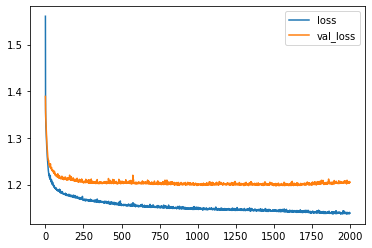

In [134]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

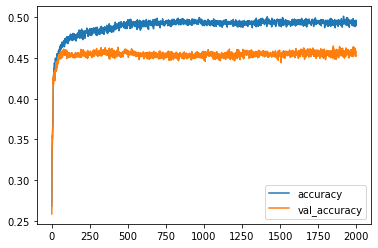

In [135]:
metrics[['accuracy','val_accuracy']].plot()

In [136]:
# Sequential predict_classes function is deprecated
# predictions = ai_brain.predict_classes(X_test)
x_test_predictions = np.argmax(ai_brain.predict(X_test_scaled), axis=1)

In [137]:
x_test_predictions.shape

(2911,)

In [138]:
y_test_truevalue = np.argmax(y_test,axis=1)

In [139]:
y_test_truevalue.shape

(2911,)

In [140]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test_truevalue,x_test_predictions))

[[383  97 110 167]
 [256 137 201  92]
 [140 115 349  82]
 [206  54  57 465]]


In [141]:
print(classification_report(y_test_truevalue,x_test_predictions))

              precision    recall  f1-score   support

           0       0.39      0.51      0.44       757
           1       0.34      0.20      0.25       686
           2       0.49      0.51      0.50       686
           3       0.58      0.59      0.59       782

    accuracy                           0.46      2911
   macro avg       0.45      0.45      0.44      2911
weighted avg       0.45      0.46      0.45      2911



In [142]:
# Saving the Model
ai_brain.save('customer_classification_model.h5')

In [143]:
# Saving the data

import pickle
with open('customer_data.pickle', 'wb') as fh:
   pickle.dump([X_train_scaled,y_train,X_test_scaled,y_test,cust_1,df_cleaned,scaler_age,enc,one_hot_enc,le], fh)

In [144]:
# Loading the data
with open('customer_data.pickle', 'rb') as fh:
   [X_train_scaled,y_train,X_test_scaled,y_test,cust_1,df_cleaned,scaler_age,enc,one_hot_enc,le]=pickle.load(fh)

In [145]:
x_single_prediction = np.argmax(ai_brain.predict(X_test_scaled[1:2,:]), axis=1)

In [146]:
print(x_single_prediction)

[2]


In [147]:
print(le.inverse_transform(x_single_prediction))

['C']
